## Project Description: Predicting Diabates Diagnosis using a Classification model, and deploying it on Azure ML

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
dataset = pd.read_csv("C:/Users/monis/Downloads/Diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### The dataset has 9 dimensions, of which 8 are features and the last dimenision, outcome is the label, which is the predictor of the state of diagnosis. 

In [4]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
label = 'Outcome'
X, y = dataset[features].values, dataset[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] 
  Label: 1
Patient 2 
  Features: [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] 
  Label: 0
Patient 3 
  Features: [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] 
  Label: 1
Patient 4 
  Features: [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] 
  Label: 0


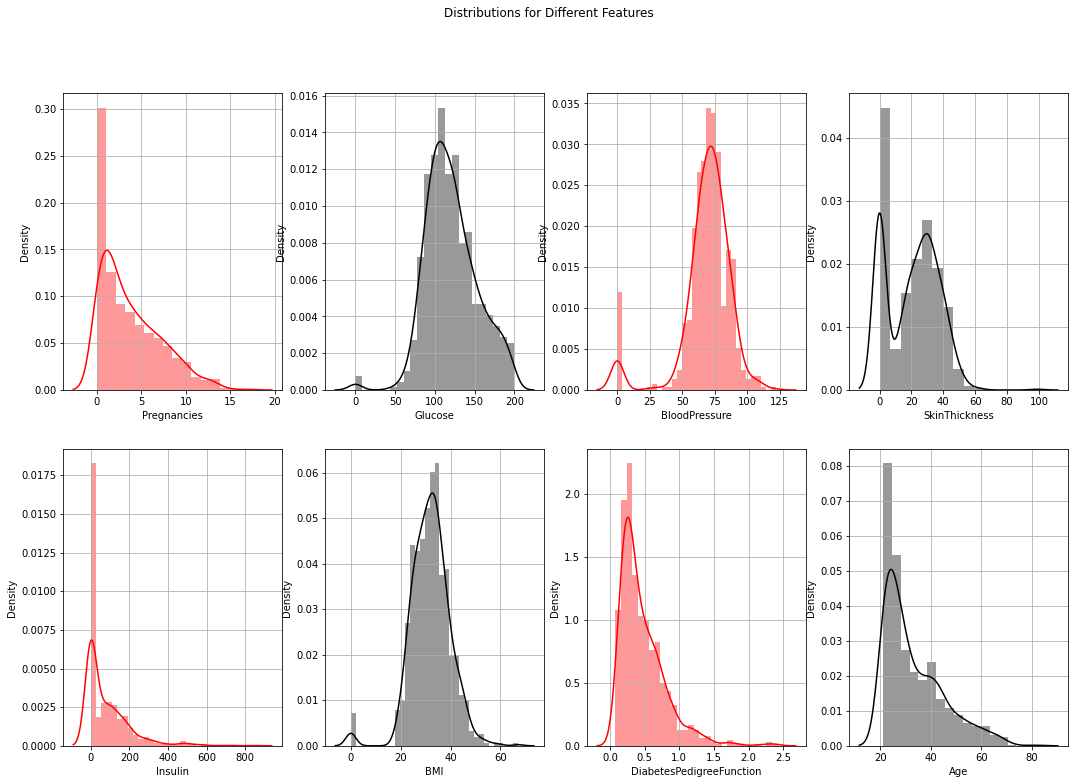

In [5]:
plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(dataset['Pregnancies'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(dataset['Glucose'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(dataset['BloodPressure'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(dataset['SkinThickness'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(dataset['Insulin'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(dataset['BMI'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(dataset['DiabetesPedigreeFunction'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(dataset['Age'], color = 'black')
plt.grid()

plt.suptitle('Distributions for Different Features')
plt.show()

### The above graphs depict the distribution of the various feautures in the dataset

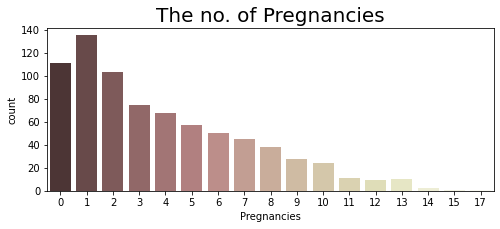

In [6]:
plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(dataset['Pregnancies'], palette = 'pink')
plt.title('The no. of Pregnancies', fontsize = 20)
plt.show()

### From the above graph it is clear that the dataset consists of maximum combination of no pregnanices and 1, 2, 3 Pregnancies. 

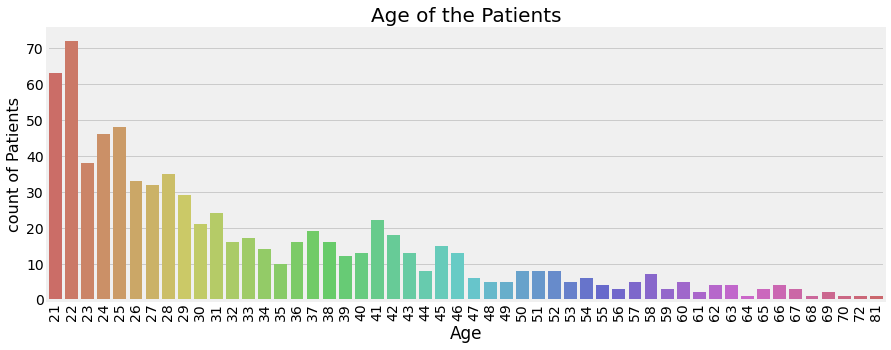

In [7]:
plt.figure(figsize = (15, 5))
plt.style.use('fivethirtyeight')

sns.countplot(x = 'Age', data = dataset, palette = 'hls')
plt.title('Age of the Patients', fontsize = 20)
plt.ylabel('count of Patients', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

### The maximum patients belong to 20,s age-group.

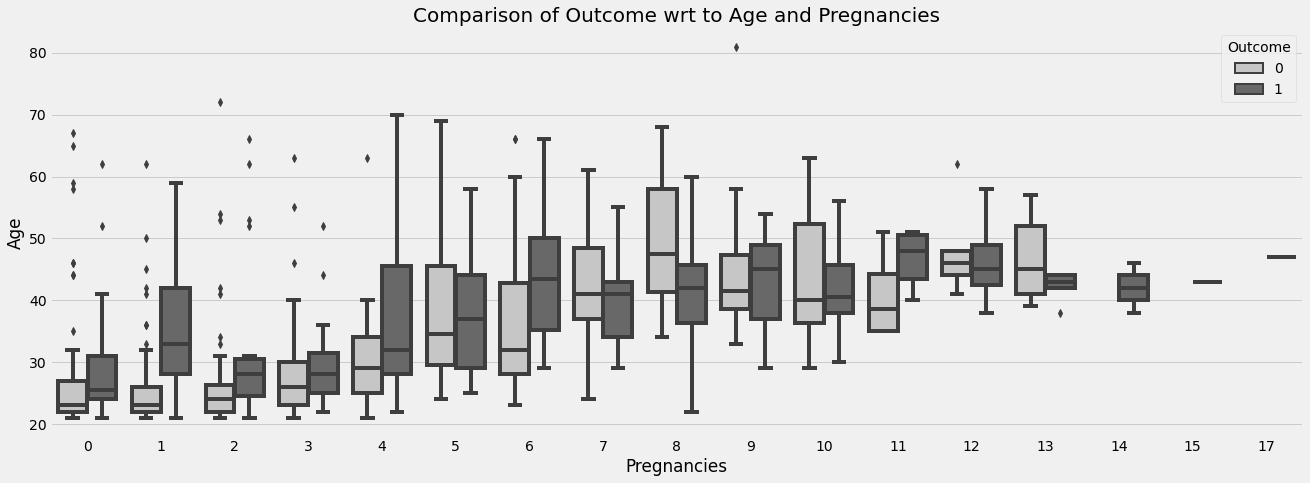

In [8]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(dataset['Pregnancies'], dataset['Age'], hue = dataset['Outcome'], palette = 'Greys')
plt.title('Comparison of Outcome wrt to Age and Pregnancies', fontsize = 20)
plt.show()

### The above plot represents the Age on y-axis and Pregnancies on X-axis, further it shows the diagnosis state, which is positive, with 1,4,5,6 Pregnancies.

#### *X (features) and the label y (outcome), the outcome is the display of first 4 rows that consisits of patients' information.*

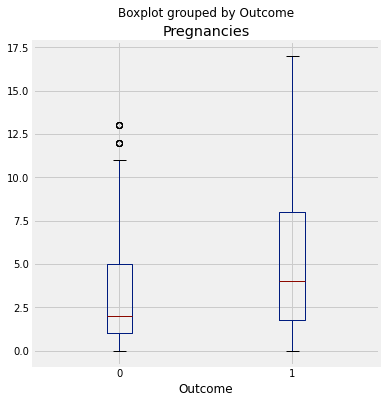

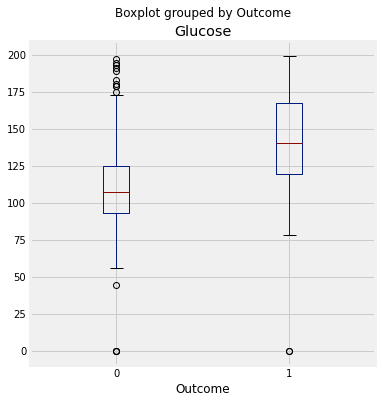

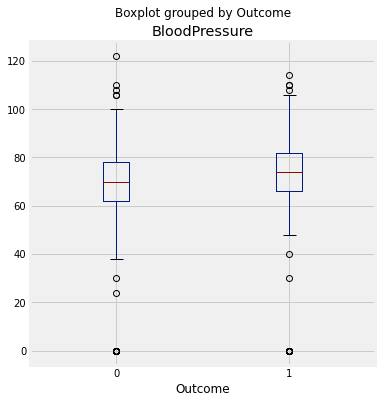

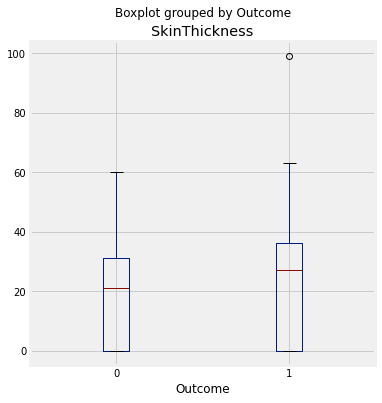

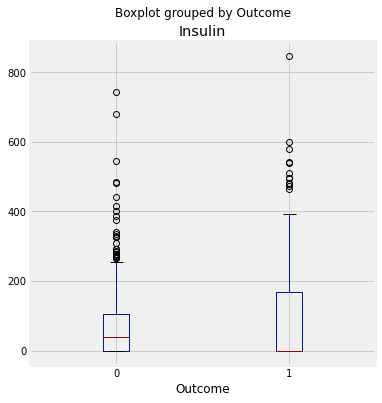

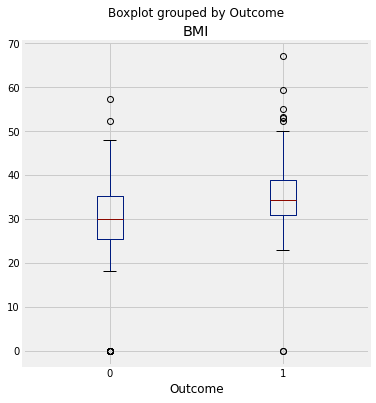

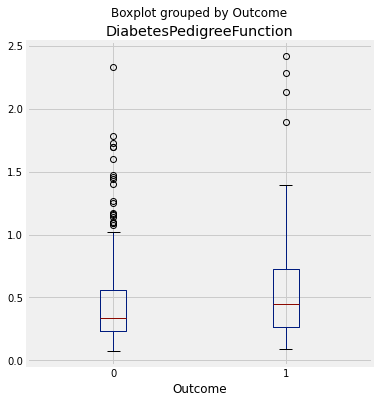

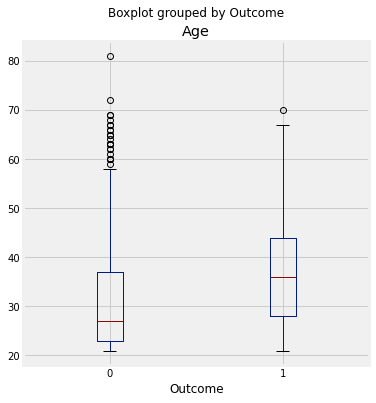

In [9]:
%matplotlib inline

features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in features:
    dataset.boxplot(column=col, by='Outcome', figsize=(6,6))
    plt.title(col)
plt.show()

### For some of the features, there's a noticeable difference in the distribution for each label value. In particular, Pregnancies and Age show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

In [10]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### There are no null values in the dataset

<AxesSubplot:ylabel='Pregnancies'>

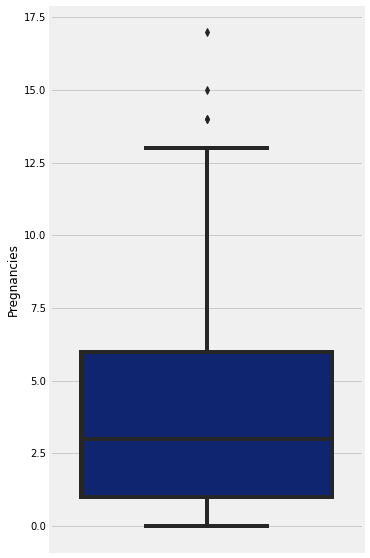

In [11]:
plt.figure(figsize = (5,10))
sns.boxplot(y = 'Pregnancies',data = dataset)

In [12]:
print(np.where(dataset['Pregnancies']>12))

(array([ 28,  72,  86,  88, 159, 274, 298, 323, 357, 455, 518, 635, 691,
       744], dtype=int64),)


In [13]:
dataset.drop([28,  72,  86,  88, 159, 274, 298, 323, 357, 455, 518, 635, 691,
       744],inplace = True)

### As there are only few outliers in Preganancies Feature, Drop them 

<AxesSubplot:ylabel='Age'>

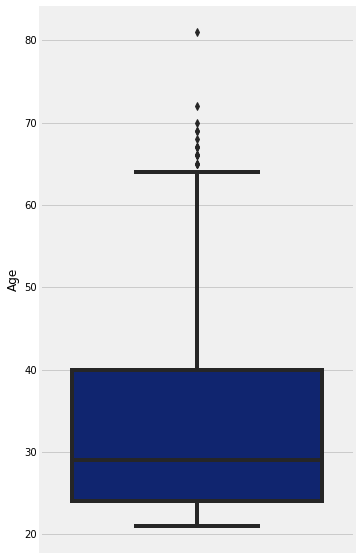

In [14]:
plt.figure(figsize = (5,10))
sns.boxplot(y = 'Age',data = dataset)

In [15]:
print(np.where(dataset['Age']>65))

(array([119, 216, 354, 444, 449, 479, 485, 526, 541, 654, 662, 672, 745],
      dtype=int64),)


### Age could be a useful factor in determination of Diagnosis, thus the outliers are not dropped.

<AxesSubplot:ylabel='Insulin'>

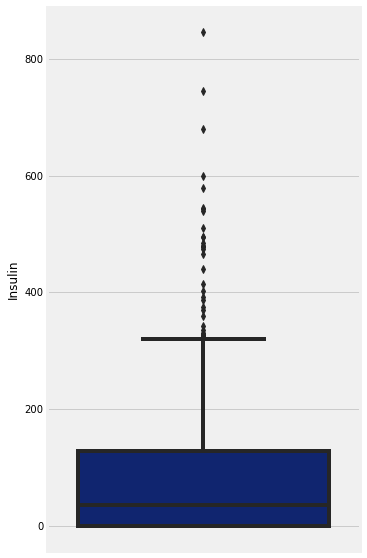

In [16]:
plt.figure(figsize = (5,10))
sns.boxplot(y = 'Insulin',data = dataset)

### Insulin is the allows glucose to enter the body's cells to provide energy, thus the outliers here is crucial for the correct representation of the Patients' health history. Thus, do not eliminate any outliers here. 

## Spiltting the Dataset

In [17]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 537
Test cases: 231


### Splitting the dataset is the necessary step because, the reliability and accuracy is checked through the test set and thus it determines the overall performance of the model. 

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### This step is run to get the data to a standard/same scale for the training to take least time. 

## Building a Logistic Regression Model

In [19]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


### Predicting the Y test labels

In [20]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0]
Actual labels:     [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]


### Checking the accuracy of the model 

In [21]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7792207792207793


### The other metrics for a Classification model

In [22]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [23]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7090909090909091
Overall Recall: 0.527027027027027


### The confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[141  16]
 [ 35  39]]


## Training with other Classification Models

## Naive Bayes Model

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

### Checking for the accuracy

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[138  19]
 [ 36  38]]


0.7619047619047619

## Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',  random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [29]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

### Checking for the accuracy

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[135  22]
 [ 37  37]]


0.7445887445887446

## Of these three models, Logistic Regression has scored  better with *80% Accuracy*